In [4]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from random import random


QUESTION-2

In [394]:
class unionfind:
    parent_node = {}

    def add(self, u):
        
        self.parent_node[u] = u

    def find(self, k):
        if self.parent_node[k] == k:
            return k
        return self.find(self.parent_node[k])

    def union(self, a, b):
        self.parent_node[self.find(a)] = self.find(b)

In [395]:
def two_pass(image,threshold):
                                                         # Input is Grayscale image
    h,w = image.shape
    image_thresh = image.copy()
    twopass_img = np.empty((h,w),dtype = int)
    final_img = np.zeros((h,w,3),dtype = int)
    associations = unionfind()
    image_thresh[image_thresh < threshold ] = 0
    image_thresh[image_thresh >= threshold ] = 1

    label = 1
    twopass_img[0][0] = label
    associations.add(label)

    for i in range(h):
        for j in range(w):
            if i == 0 and j == 0:
                if image_thresh[0][0] != 0:
                    twopass_img[i][j] = label
                else:
                    twopass_img[i][j] = 0
            elif i == 0:
                if image_thresh[i][j] == 0:
                    twopass_img[i][j] = 0
                elif image_thresh[i][j-1] == 0:
                    label += 1
                    associations.add(label)
                    twopass_img[i][j] = label
                elif image_thresh[i][j-1] != 0:
                    twopass_img[i][j] = twopass_img[i][j-1]
            elif j == 0:
                if image_thresh[i][j] == 0:
                    twopass_img[i][j] = 0
                elif twopass_img[i-1][j] == 0:
                    label += 1
                    associations.add(label)
                    twopass_img[i][j] = label
                else:
                    twopass_img[i][j] = twopass_img[i-1][j]
            else:
                if image_thresh[i][j] == 0:
                    twopass_img[i][j] = 0
                else:
                    left = twopass_img[i][j-1]
                    top = twopass_img[i-1][j]
                    if left == 0 and top == 0:
                        label += 1
                        associations.add(label)
                        twopass_img[i][j] = label
                    elif left == 0:
                        twopass_img[i][j] = top
                    elif top == 0:
                        twopass_img[i][j] = left
                    else:
                        mini,maxi = min(top,left),max(top,left)
                        twopass_img[i][j] = mini
                        associations.union(maxi,mini)
    
    label_color = {}
    for i in range(h):
        for j in range(w):
            if twopass_img[i][j] != 0:
                x = associations.find(twopass_img[i][j])
                
                if not label_color.get(x) :
                    label_color[x] = [np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)]

                twopass_img[i][j] = x

                final_img[i][j] = np.array(label_color[x])

    
    return twopass_img,final_img

             

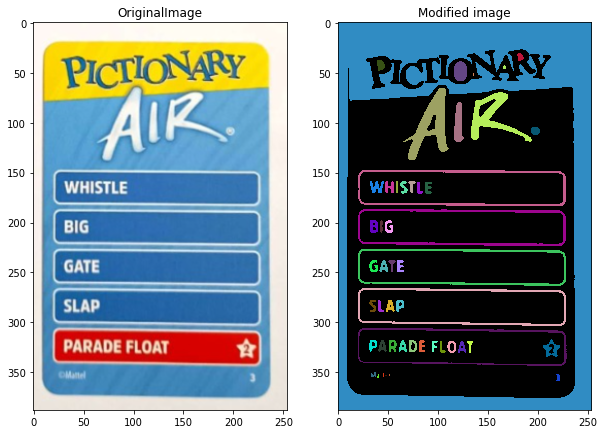

In [404]:
pict = cv2.imread("../imgs/pictionary.png",0)
pict1 = cv2.imread("../imgs/pictionary.png")

pict_rgb = cv2.cvtColor(pict1,cv2.COLOR_BGR2RGB)
label_img,colored_img = two_pass(pict,175)

fig = plt.figure(figsize = (10,10))
fig.add_subplot(1,2,1)
plt.imshow(pict_rgb)
plt.title("OriginalImage")
fig.add_subplot(1,2,2)
plt.imshow(colored_img)
plt.title("Modified image")
plt.show()

QUESTION - 3

1

In [405]:
def mediangray(image,k):
    h,w = image.shape
    filtered_image = np.empty((h,w),dtype = int)
    pad_image = np.pad(image, (k//2, k//2), 'constant', constant_values=(0))
    for i in range(h):
        for j in range(w):
            mango = pad_image[i:i+k,j:j+k]
            filtered_image[i][j] = np.median(mango)

    return filtered_image

In [406]:
def median_filter(image,k):
    h,w,c = image.shape
    final_img = np.empty(image.shape)
    red_channel = image[:,:,2]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,0]
    
    red_channel = mediangray(red_channel,3)
    green_channel = mediangray(green_channel,3)
    blue_channel = mediangray(blue_channel,3)

    final_img = np.dstack((red_channel,green_channel,blue_channel))

    return final_img

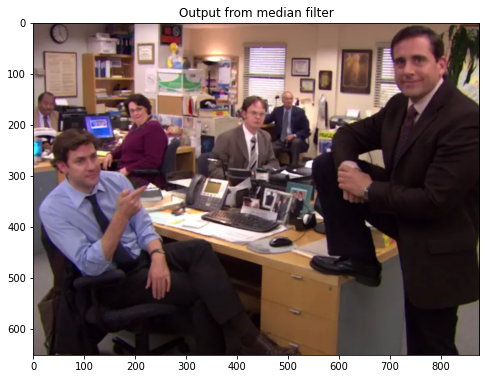

In [407]:
inp = cv2.imread("../imgs/salt.png")
out = median_filter(inp,3)
plt.figure(figsize = (8,8))
plt.imshow(out)
plt.title("Output from median filter")
plt.show()

2

In [408]:
def powerLawTransform(gimage,gamma):
    himage,wimage = gimage.shape
    gimage = gimage/255
    ga_imag = np.empty((himage,wimage),dtype = 'i')

    ga_imag = gimage**gamma    
    return ga_imag

In [409]:
def contrastenhancement(image,gammared,gammagreen,gammablue):
    h,w,c = image.shape
    red_channel = image[:,:,2]
    
    green_channel = image[:,:,1]
    
    blue_channel = image[:,:,0]

    red = powerLawTransform(red_channel,gammared)

    green = powerLawTransform(green_channel,gammagreen)
    
    blue = powerLawTransform(blue_channel,gammablue)
    

    final_img = np.dstack((red,green,blue))
    
    return final_img

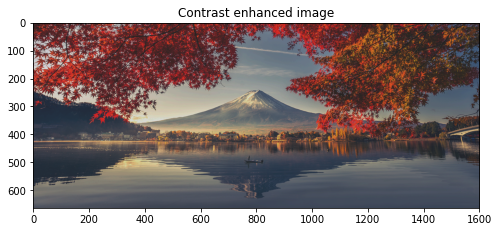

In [410]:
input_img = cv2.imread("../imgs/landscape.png")
h,w,c = input_img.shape
output_img = np.empty((h,w,c),dtype = int)
output_img = contrastenhancement(input_img,8.2,8.,8.2)
plt.figure(figsize = (8,8))
plt.imshow(output_img)
plt.title('Contrast enhanced image')
plt.show()

3

In [411]:
def hist_equal(image):
    himage,wimage=image.shape
    flatten_image = image.flatten()

    freq_values,binvalues = np.histogram(flatten_image, bins= [i for i in range(256)],density = True )
    zipped = dict(zip(binvalues,freq_values))

    s = {}
    for j in range(256):
        s[j] = int(255*sum(freq_values[:j+1]))

    image_equal = np.empty((himage,wimage),dtype = int)
    for i in range(himage):
        for j in range(wimage):
            image_equal[i][j] = s[image[i][j]]
  
    return image_equal,s

In [412]:
def colorhist_equal(image):
    h,w,c = image.shape
    redchannel = image[:,:,2]
    greenchannel = image[:,:,1]
    bluechannel = image[:,:,0]

    red,r = hist_equal(redchannel)
    green,g = hist_equal(greenchannel)
    blue,b = hist_equal(bluechannel)

    finalim = np.dstack((red,green,blue))

    return finalim

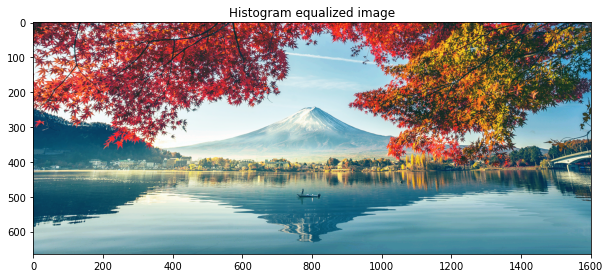

In [413]:
hi_inp = cv2.imread("../imgs/landscape.png")
hi_op = colorhist_equal(hi_inp)
plt.figure(figsize = (10,10))
plt.imshow(hi_op)
plt.title("Histogram equalized image")
plt.show()

4

Vintage Effect

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


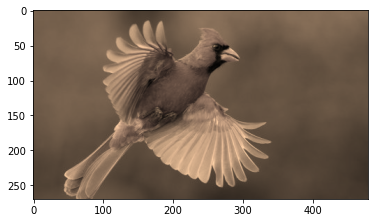

In [357]:
bird = cv2.imread("../imgs/birds.jpg")
h,w,c = bird.shape
r1 = np.empty((h,w),dtype = int)
g1 = np.empty((h,w),dtype = int)
b1 = np.empty((h,w),dtype = int)
r = bird[:,:,2]/255
g = bird[:,:,1]/255
b = bird[:,:,0]/255

r1 = (0.3*r + 0.76*g + 0.22*b)
g1 = (0.22*r + 0.64*g + 0.19*b)
b1 = (0.2*r + 0.52*g + 0.11*b)

final = np.dstack((r1,g1,b1))
plt.imshow(final)
plt.show()

In [365]:
def effMeanFilter(image,k):
  h,w = image.shape
  filtered_image = np.empty((h,w),dtype = int)
  kernel = np.ones((k,k),dtype = int)
  pad_image = np.pad(image, (k//2, k//2), 'constant', constant_values=(0))
  for i in range(h):
    for j in range(w):
      if j == 0:
        sumi = np.sum(np.multiply(pad_image[i:i + k,j:j + k],kernel).flatten())
        filtered_image[i][j] = sumi/(k**2)
      else:
        sub = np.sum(np.dot(pad_image[i:i + k,j-1:j],kernel[0:1,0:k]))
        add = np.sum(np.dot(pad_image[i:i + k,j + k -1:j+k],kernel[0:1,0:k]))
        sumi =  sumi - sub + add
        filtered_image[i][j] =sumi/(k**2)
        #filtered_image[i][j] = filtered_image[i][j]/(k**2)
  return filtered_image

Vignetting

0.3983746041129039


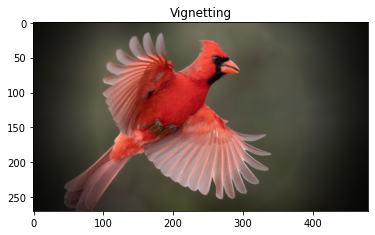

In [393]:
bird = cv2.imread("../imgs/birds.jpg")
h,w,c = bird.shape
r1 = np.empty((h,w),dtype = int)
g1 = np.empty((h,w),dtype = int)
b1 = np.empty((h,w),dtype = int)
r = bird[:,:,2]/255
g = bird[:,:,1]/255
b = bird[:,:,0]/255


dist_mat = np.empty((h,w))
for i in range(h):
    for j in range(w):
        dist_mat[i][j] = np.sqrt((i - h//2)**2 + (j - w//2)**2)


gaussian = np.empty((h,w))
for i in range(h):
    for j in range(w):
        gaussian[i][j] = np.exp((-(i - h//2)**2 - (j - w//2)**2)/2*(0.009)**2)

print(gaussian[150][90])

gaussian[gaussian > 0.4] = 0.4

gaussian = gaussian/0.4

r1 = r*gaussian
g1 = g*gaussian
b1 = b*gaussian

final = np.dstack((r1,g1,b1))
plt.imshow(final)
plt.title("Vignetting")
plt.show()

Duo-Tone

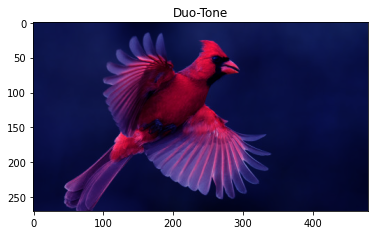

In [359]:
bird = cv2.imread("../imgs/birds.jpg")
h,w,c = bird.shape
r1 = np.empty((h,w),dtype = int)
g1 = np.empty((h,w),dtype = int)
b1 = np.empty((h,w),dtype = int)
r = bird[:,:,2]/255
g = bird[:,:,1]/255
b = bird[:,:,0]/255

r1 = r**3
g1 = g**2.5
b1 = b

final = np.dstack((r1,g1,b1))
plt.imshow(final)
plt.title("Duo-Tone")
plt.show()

QUESTION-4

4.1

1 and 2

In [310]:
def imrotate(image,theta,retainAllPixels):

    h,w = image.shape
    final_image = np.empty((h,w),dtype = int)
    if retainAllPixels:
        final_image = imrotatefull(image,theta)
    else:
        final_image = imrotatesame(image,theta)
 
    return final_image

In [304]:
def imrotatesame(image,theta):
    h,w = image.shape
    
    rot_img = np.zeros((h,w),dtype = int)

    rad = (math.pi*theta)/180
    cos = math.cos(rad)
    sin = math.sin(rad)
    itm = np.array([[cos,sin],[-sin,cos]])
    
    sc = np.array([h//2 , w//2])
    for i in range(h):
        for j in range(w):
            tc = np.array([i - h//2 , j - w//2])
            co = np.dot(itm,tc)
            co = co + sc
            #print(co)
            if round(co[0]) < h and round(co[1]) < w and co[0] >= 0 and co[1] >= 0:
                rot_img[i][j] = image[round(co[0])][round(co[1])]
    
    return rot_img

In [306]:
def height_width(image,theta):
    h,w = image.shape
    rad = (math.pi*theta)/180
    cos = math.cos(rad)
    sin = math.sin(rad)

    tm = np.array([[cos,-sin],[sin,cos]])

    top = np.array([0 - h//2 , w - w//2])
    bottom = np.array([h - h//2 , 0 - w//2])
    left = np.array([-h//2 , -w//2])
    right = np.array([h - h//2 , w - w//2])

    t1 = np.dot(tm,top)[0]
    t2 = np.dot(tm,bottom)[0]
    t3 = np.dot(tm,left)[0]
    t4 = np.dot(tm,right)[0]
    
    p1 = np.dot(tm,top)[1]
    p2 = np.dot(tm,bottom)[1]
    p3 = np.dot(tm,left)[1]
    p4 = np.dot(tm,right)[1]
    
    
    min_x = min(t1,t2,t3,t4)
    max_x = max(t1,t2,t3,t4)

    min_y = min(p1,p2,p3,p4)
    max_y = max(p1,p2,p3,p4)
    

    height = round(abs(min_x) + abs(max_x))
    width = round(abs(min_y) + abs(max_y))
    

    return height,width


In [316]:
def imrotatefull(image,theta):
    h,w = image.shape
    h1,w1 = height_width(image,theta)
    
    rot_img = np.zeros((h1,w1),dtype = int)
    rad = (math.pi*theta)/180
    cos = math.cos(rad)
    sin = math.sin(rad)

    itm = np.array([[cos,sin],[-sin,cos]])

    for i in range(h1):
        for j in range(w1):
            co = np.array([i - h1//2 , j - w1//2])
            cc = np.dot(itm,co)
            sm = np.array([h//2,w//2])
            cm = cc + sm

            xc = cm[0]
            yc = cm[1]

            if round(xc) < h and round(yc) < w and round(xc) > 0 and round(yc) > 0:
                rot_img[i][j] = image[round(xc)][round(yc)]

    return rot_img

3

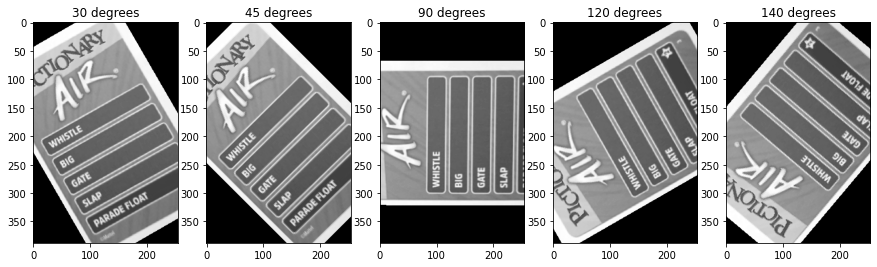

In [318]:
fruits = cv2.imread("../imgs/pictionary.png",0)
img1 = imrotate(fruits,30,False)
img2 = imrotate(fruits,45,False)
img3 = imrotate(fruits,90,False)
img4 = imrotate(fruits,120,False)
img5 = imrotate(fruits,140,False)
fig = plt.figure(figsize = (15,15))
fig.add_subplot(1,5,1)
plt.imshow(img1,cmap = 'gray')
plt.title('30 degrees')
fig.add_subplot(1,5,2)
plt.imshow(img2,cmap = 'gray')
plt.title('45 degrees')
fig.add_subplot(1,5,3)
plt.imshow(img3,cmap = 'gray')
plt.title('90 degrees')
fig.add_subplot(1,5,4)
plt.imshow(img4,cmap = 'gray')
plt.title('120 degrees')
fig.add_subplot(1,5,5)
plt.imshow(img5,cmap = 'gray')
plt.title('140 degrees')

plt.show()

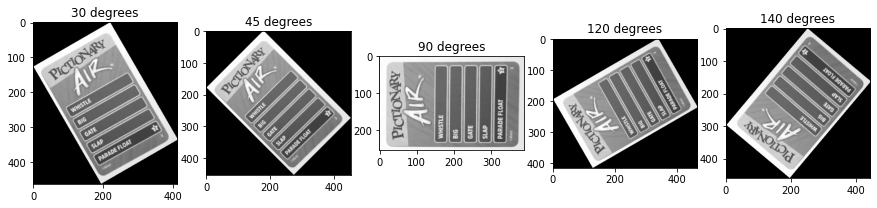

In [320]:
fruits = cv2.imread("../imgs/pictionary.png",0)
img1 = imrotate(fruits,30,True)
img2 = imrotate(fruits,45,True)
img3 = imrotate(fruits,90,True)
img4 = imrotate(fruits,120,True)
img5 = imrotate(fruits,140,True)
fig = plt.figure(figsize = (15,15))
fig.add_subplot(1,5,1)
plt.imshow(img1,cmap = 'gray')
plt.title('30 degrees')
fig.add_subplot(1,5,2)
plt.imshow(img2,cmap = 'gray')
plt.title('45 degrees')
fig.add_subplot(1,5,3)
plt.imshow(img3,cmap = 'gray')
plt.title('90 degrees')
fig.add_subplot(1,5,4)
plt.imshow(img4,cmap = 'gray')
plt.title('120 degrees')
fig.add_subplot(1,5,5)
plt.imshow(img5,cmap = 'gray')
plt.title('140 degrees')
plt.show()


4

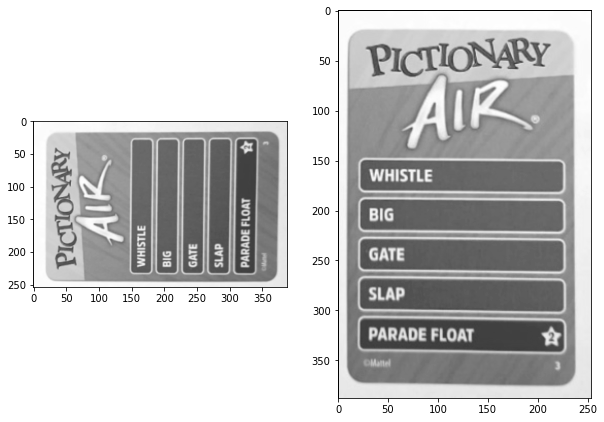

In [324]:
img6 = imrotate(img3,-90,True)
fig = plt.figure(figsize = (10,10))
fig.add_subplot(1,2,1)
plt.imshow(img3,cmap = 'gray')
fig.add_subplot(1,2,2)
plt.imshow(img6,cmap = 'gray')
plt.show()


4.2

1

When edge detection is done on the given image, orientation matrix is obtained. The theta values gives the direction of the gradient, which is perpendicular to the edge direction.So, adding 90 degrees to the orientation matrix leads to pointing in edge direction. Using these values of theta and hough transform, the required theta can be obtained from accumulator matrix. The accumulator value corresponding to this theta will be maximum.

2

In [70]:
def edgedetection(image,kernel,k):
  detectors = {'Prewittx3':np.array([[-1,0,1],[-1,0,1],[-1,0,1]]),
               'Prewitty3':np.array([[-1,-1,-1],[0,0,0],[1,1,1]]),
               'Sobelx3':np.array([[-1,0,1],[-2,0,2],[-1,0,1]]),
               'Sobely3':np.array([[-1,-2,-1],[0,0,0],[1,2,1]]),
               'Laplacian1':np.array([[0,1,0],[1,-4,1],[0,1,0]]),
               'Laplacian2':np.array([[1,1,1],[1,-8,1],[1,1,1]]),
               }
  h,w = image.shape
  filtered_image = np.zeros((h,w),dtype = int)
  pad_image = np.pad(image, (k//2, k//2), 'constant', constant_values=(0))

  for i in range(h):
    for j in range(w):
      
        sum = np.sum(np.multiply(pad_image[i:i + k,j:j + k],detectors[kernel]).flatten())
        filtered_image[i][j] = sum
      
  return filtered_image

In [117]:
def nearest_index(arr,value):
    dif_arr = np.absolute(arr-value)
    index = dif_arr.argmin()
    return index

In [337]:
def h_t(image,accu_rows,accu_col,threshold_accu,threshold_edge):
    h,w,c = image.shape
    final_img = image.copy()
    gray_scale = np.empty((h,w),dtype = int)
    edgex = np.empty((h,w),dtype = int)
    edgey = np.empty((h,w),dtype = int)
    magnitude = np.empty((h,w),dtype = int)
    thresh_edge = np.empty((h,w),dtype = int)
    accu_array = np.zeros((accu_rows,accu_col),dtype = int)

    gray_scale = (image[:,:,0] + image[:,:,1] + image[:,:,2])/3
    edgex = edgedetection(gray_scale,'Sobelx3',3)
    edgey = edgedetection(gray_scale,'Sobely3',3)
    magnitude = np.sqrt(np.square(edgex) + np.square(edgey))
    thresh_edge[magnitude < threshold_edge] = 0
    thresh_edge[magnitude >= threshold_edge] = 1
    
    diagonal = np.sqrt(h**2 + w**2)

    rhos = np.linspace(-diagonal,diagonal,accu_rows)
    thetas = np.linspace(-180,180,accu_col)
    
    for i in range(h):
        for j in range(w):
            if thresh_edge[i][j] != 0:
                for k in range(accu_col):
                    rho_cal = i*np.cos(np.deg2rad(thetas[k])) + j*np.sin(np.deg2rad(thetas[k]))
                    row_numb = nearest_index(rhos,rho_cal)
                    accu_array[row_numb][k] += 1
    
    max_instance = np.max(accu_array)
    #print(max_instance)
    res = np.where(accu_array == max_instance)
    max_thet = thetas[res[1][0]]

    sel_rhos = []
    sel_thet = []
    
  
    for i in range(accu_rows):
        for j in range(accu_col):
            if accu_array[i][j] >= threshold_accu:
                sel_rhos.append(rhos[i])
                sel_thet.append(thetas[j])
    
    len_sel = len(sel_rhos)
    for k in range(len_sel):
        for i in range(h):
            for j in range(w):
                num = sel_rhos[k] - j*np.sin(np.deg2rad(sel_thet[k]))
                den = np.cos(np.deg2rad(sel_thet[k]))
                row_numb = int(round(num/den))
               
                if row_numb < h and row_numb >= 0:
                    final_img[row_numb][j] = np.array([0,0,255])
                    
    return final_img,max_thet

116.60377358490564


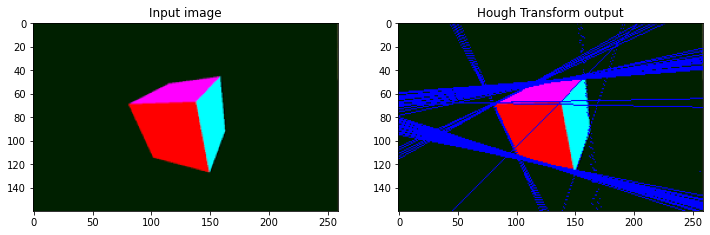

In [273]:
img = cv2.imread("../imgs/cube2.png")
h,w,c = img.shape
diag = int(np.sqrt(h**2 + w**2))
img2 = img[15:175,:]

output,max_occur_theta = h_t(img2,2*diag,160,40,100)
print(max_occur_theta)
fig = plt.figure(figsize = (12,12))
fig.add_subplot(1,2,1)
plt.imshow(img2)
plt.title("Input image")
fig.add_subplot(1,2,2)
plt.imshow(output)
plt.title("Hough Transform output")
plt.show()

3

In [326]:
omr1 = cv2.imread("../imgs/rotatedOMR1.png")
ob_img,ob_theta = h_t(omr1,300,60,8900,25)
print(ob_theta)

3.0508474576271


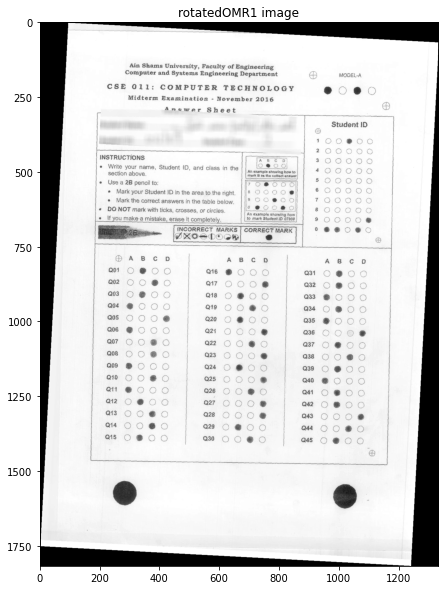

In [332]:
omr11 = cv2.imread("../imgs/rotatedOMR1.png",0)
x = imrotate(omr11,-ob_theta,True)
plt.figure(figsize = (10,10))
plt.imshow(x,cmap = 'gray')
plt.title("rotatedOMR1 image")
plt.show()

In [341]:
omr2 = cv2.imread("../imgs/rotatedOMR2.png")
h,w,c = omr2.shape
out_2,ob_thet2 = h_t(omr2,300,60,9000,25)
print(ob_thet2)

-180.0


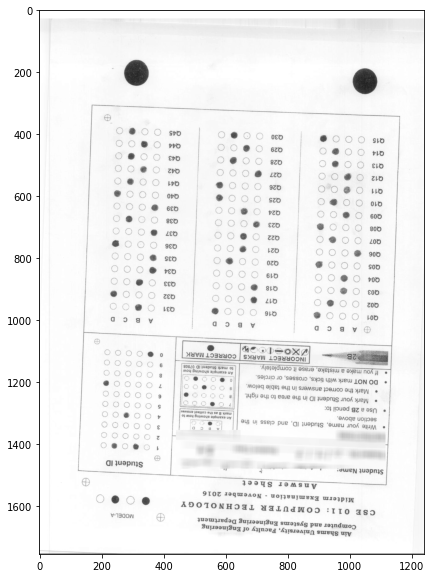

In [342]:
omr22 = cv2.imread("../imgs/rotatedOMR2.png",0)
y = imrotate(omr22,180,True)
plt.figure(figsize = (10,10))
plt.imshow(y,cmap = 'gray')
plt.show()

QUESTION - 5

1

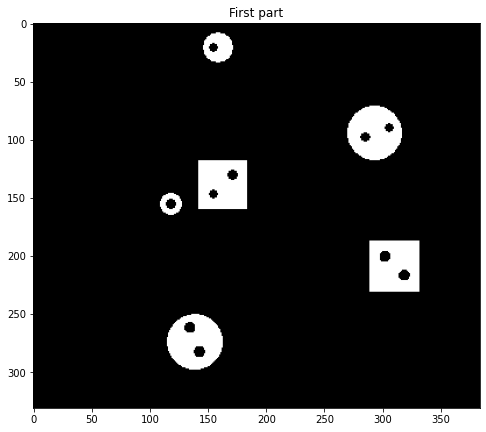

In [144]:
initial_img = cv2.imread("../imgs/shapes.png",0)
h,w = initial_img.shape
label_img = np.empty((h,w),dtype = int)
inverted_img = np.empty((h,w),dtype = int)
no_holes_img = np.empty((h,w),dtype = int)
first_part = np.empty((h,w),dtype = int)
initial_img[initial_img <  200] = 0
initial_img[initial_img >= 200] = 1

label_img,color = two_pass(initial_img,1)

inverted_img = 1 - initial_img

inverted_img,colored = two_pass(inverted_img,1)

for i in range(h):
    for j in range(w):
        if inverted_img[i][j] != 0 and inverted_img[i][j] != 1:
            inverted_img[i][j] = 1
        else:
            inverted_img[i][j] = 0

no_holes_img = inverted_img + initial_img

no_holes_labeled,color_img = two_pass(no_holes_img,1)

for i in range(h):
    for j in range(w):
        if label_img[i][j] != 0:
            label_img[i][j] = no_holes_labeled[i][j]

label_holes = no_holes_labeled*inverted_img
labels_of_holes = list(np.unique(label_holes))[1:]
for i in range(h):
    for j in range(w):
        x = label_img[i][j]
        if x in labels_of_holes:
            first_part[i][j] = 1
        else:
            first_part[i][j] = 0

plt.figure(figsize = (8,8))
plt.imshow(first_part,cmap = 'gray')
plt.title('First part')
plt.show()

In [165]:
k = 3
square_identifier = np.empty((k,k),dtype = int)
for i in range(k):
    for j in range(k):
        if i <= (k-3)//2 or j <= (k-3)//2:
            square_identifier[i][j] = 0
        else:
            square_identifier[i][j] = 1

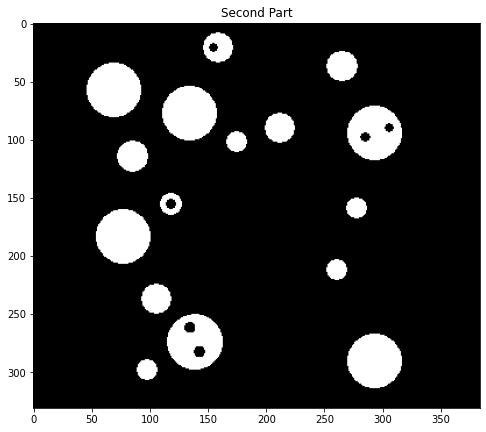

In [169]:
labels_squares = []
h,w = label_img.shape

for i in range(1,h-1):
    for j in range(1,w-1):
        mango = initial_img[i-1:i+2,j-1:j+2]
        
        if np.all(mango == square_identifier):
            labels_squares.append(label_img[i][j])

second_part = np.empty((h,w),dtype = int)
all_squares = np.zeros((h,w),dtype = int)
for i in range(h):
    for j in range(w):
        x = label_img[i][j]
        if x in labels_squares:
            second_part[i][j] = 0 
            all_squares[i][j] = 1
        elif x != 0:
            second_part[i][j] = 1
        else:
            second_part[i][j] = 0
        
plt.figure(figsize = (8,8))
plt.imshow(second_part,cmap = 'gray')
plt.title('Second Part')
plt.show()

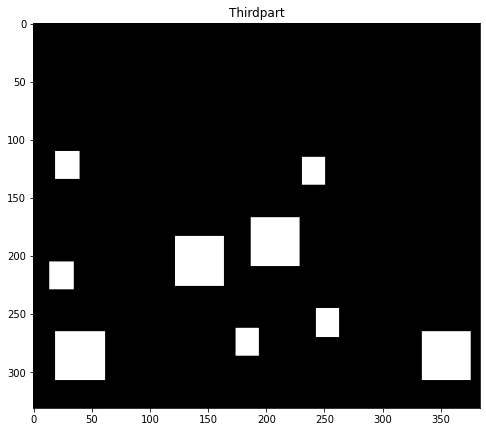

In [174]:
thirdpart = np.zeros((h,w),dtype = int)
for i in range(h):
    for j in range(w):
        x = all_squares[i][j]
        if x != 0:
            if label_img[i][j] not in labels_of_holes:
                thirdpart[i][j] = 1

plt.figure(figsize = (8,8))
plt.imshow(thirdpart,cmap = 'gray')
plt.title('Thirdpart')
plt.show()

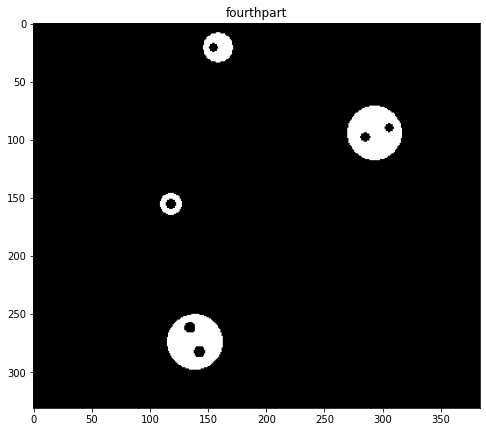

In [176]:
fourthpart = np.zeros((h,w),dtype = int)
for i in range(h):
    for j in range(w):
        x = second_part[i][j]
        if x != 0:
            if label_img[i][j] in labels_of_holes:
                fourthpart[i][j] = 1

plt.figure(figsize = (8,8))
plt.imshow(fourthpart,cmap = 'gray')
plt.title('fourthpart')
plt.show()

1

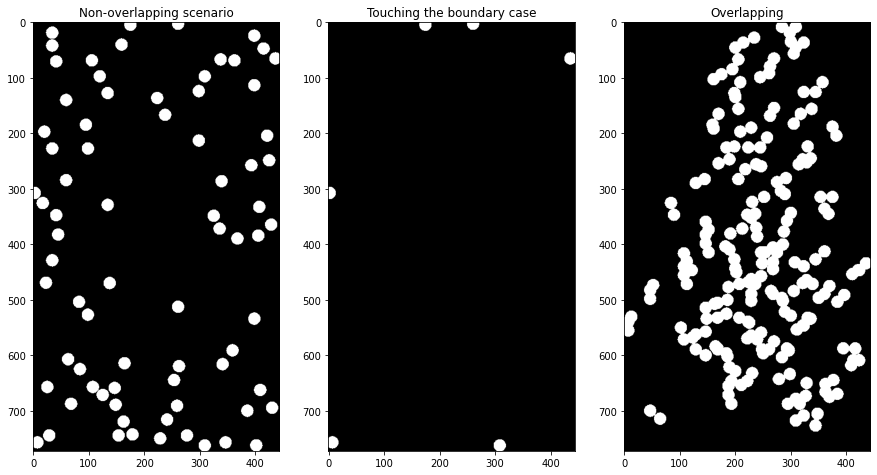

In [217]:
image = cv2.imread("../imgs/circles.jpg",0)
h,w = image.shape
non_overlap = np.zeros((h,w),dtype = int)
touching = np.zeros((h,w),dtype = int)
overlapping = np.zeros((h,w),dtype = int)
image[image < 240] = 0
image[image >= 240] = 1

label_img,color_img = two_pass(image,1)
label_dist = {}
for i in range(h):
    for j in range(w):
        if label_dist.get(label_img[i][j]) == None:
            label_dist[label_img[i][j]] = 1
        else:
            label_dist[label_img[i][j]] += 1

for i in range(h):
    for j in range(w):
        if image[i][j] != 0:
            if label_dist[label_img[i][j]] <= 400:
                non_overlap[i][j] = 1

            if label_dist[label_img[i][j]] <= 382:
                touching[i][j] = 1

            if label_dist[label_img[i][j]] > 700:
                overlapping[i][j] = 1

            

fig = plt.figure(figsize = (15,15))
fig.add_subplot(1,3,1)
plt.imshow(non_overlap,cmap = 'gray')
plt.title('Non-overlapping scenario')
fig.add_subplot(1,3,2)
plt.imshow(touching,cmap = 'gray')
plt.title('Touching the boundary case')
fig.add_subplot(1,3,3)
plt.imshow(overlapping,cmap = 'gray')
plt.title('Overlapping')
plt.show()